In [1]:
# some basic setup
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import statsmodels.api as sm
import textwrap
from statsmodels.stats.outliers_influence import summary_table
from datetime import datetime
%matplotlib inline

roldf = df = pd.read_csv("rol-scores.csv")
tsdf = pd.read_csv("unemployment.csv").iloc[:, : 3]
tsdf["Year"] = tsdf["Year"].apply(lambda x: datetime.strptime(x, '%Y %b').date())

In [2]:
roldf.head()

,State,Pop. In Millions for 2012,RoLScore,elec_pros,pol_plur,free_expr,assoc_org,per_auto,2012GDP,hprop,hfisc,hbiz,hlab,htra,hinv
0,Albania,3.2,42.60,8,10,13,8,9,1.264810e+10,30,92.6,81.0,49.0,79.8,65
1,Argentina,41.1,51.94,11,15,14,11,13,4.755020e+11,15,64.3,60.1,47.4,67.6,40
2,Australia,22.7,73.28,12,15,16,12,15,1.532410e+12,90,66.4,95.5,83.5,86.2,80
3,Austria,8.4,73.15,12,15,16,12,15,3.947080e+11,90,51.1,73.6,80.4,86.8,85
4,Bangladesh,154.7,31.57,9,11,9,8,9,1.163550e+11,20,72.7,68.0,51.9,54.0,55


In [3]:
tsdf.head()

,Year,Unemployment Rate,Accommodation and food services Quit rate
0,2001-01-01,4.2,6.4
1,2001-02-01,4.2,5.4
2,2001-03-01,4.3,5.4
3,2001-04-01,4.4,5.2
4,2001-05-01,4.3,5.3


In [4]:
def remove_chart_junk(axis, numticks, labelsize):

    # reduce ticks
    axis.locator_params(nbins=numticks)

    # remove unnecessary borders
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    axis.spines['left'].set_color((0.1, 0.1, 0.1, 0.2))
    axis.spines['bottom'].set_color((0.1, 0.1, 0.1, 0.2))

    # prettify tick labels
    axis.tick_params(axis='both',
                     which='both',
                     length=0,
                     labelsize=labelsize,
                     pad=labelsize * 0.66,
                     labelcolor=(0.25, 0.25, 0.25))
    return axis

In [5]:
def boxplot(variables,
            labels,
            title="",
            numticks=3,
            labelsize=14,
            size=(10, 10),
            font="Lato",
            notch=True):
    arrays = [np.sort(np.array(x)) for x in variables]

    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(1, 1, 1)

    ax.set_title(title + '\n',
                 fontsize=labelsize * 1.25,
                 fontname=font)

    ax = remove_chart_junk(ax, numticks, labelsize)

    bp = ax.boxplot(arrays, notch=notch, sym="k.", labels=labels)
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color="black")
    return fig

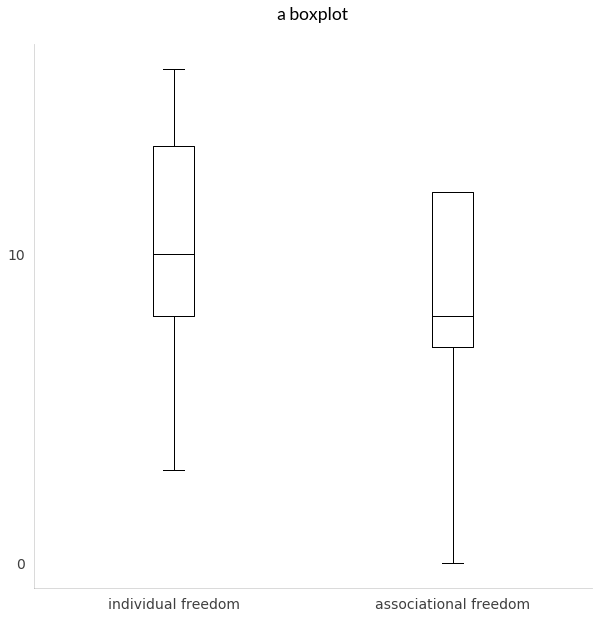

In [6]:
bptest = boxplot([roldf["per_auto"], df["assoc_org"]],
              ["individual freedom", "associational freedom"], 
              "a boxplot", notch=False)

In [7]:
bptest.__dict__

{'_agg_filter': None,
 '_alpha': None,
 '_animated': False,
 '_axobservers': [],
 '_axstack': <matplotlib.figure.AxesStack at 0x10943f978>,
 '_cachedRenderer': <matplotlib.backends.backend_agg.RendererAgg at 0x109494860>,
 '_clipon': True,
 '_clippath': None,
 '_contains': None,
 '_dpi': 72.0,
 '_gid': None,
 '_hold': True,
 '_label': '',
 '_mouseover': False,
 '_oid': 0,
 '_path_effects': [],
 '_picker': None,
 '_propobservers': {},
 '_rasterized': None,
 '_remove_method': None,
 '_sketch': None,
 '_snap': None,
 '_stale': True,
 '_sticky_edges': _XYPair(x=[], y=[]),
 '_suptitle': None,
 '_tight': False,
 '_tight_parameters': {},
 '_transform': None,
 '_transformSet': False,
 '_url': None,
 '_visible': True,
 'artists': [],
 'bbox': TransformedBbox(Bbox([[0.0, 0.0], [10.0, 10.0]]), Affine2D(array([[72.,  0.,  0.],
        [ 0., 72.,  0.],
        [ 0.,  0.,  1.]]))),
 'bbox_inches': Bbox([[0.0, 0.0], [10.0, 10.0]]),
 'callbacks': <matplotlib.cbook.CallbackRegistry at 0x10943f9b0>,
 'c

In [8]:
len(bptest._axstack.as_list())

1

In [9]:
bptest._axstack.as_list()[0]

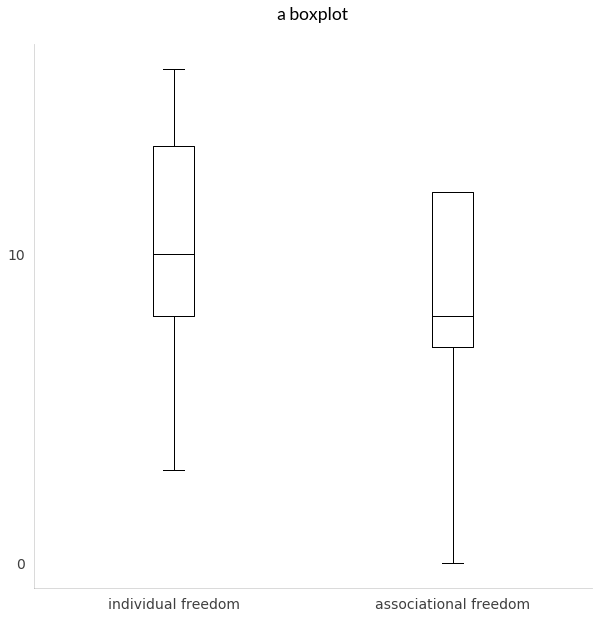

In [10]:
bptest

In [11]:
bptest._axstack.as_list()[0].set_title("KITTY!")

Text(0.5,1,'KITTY!')

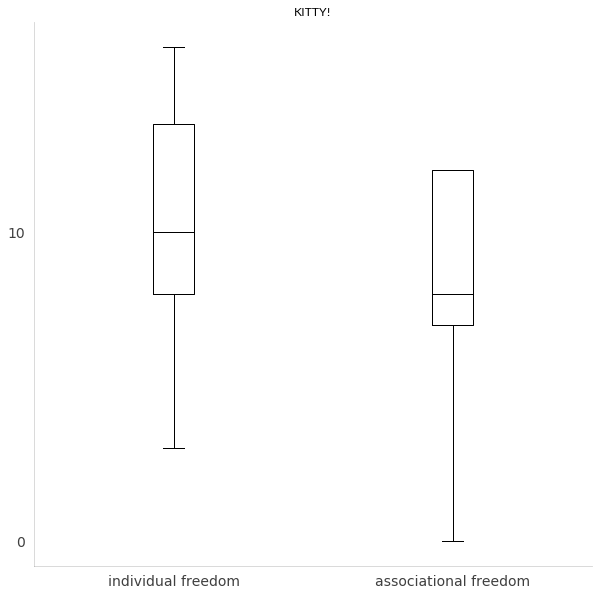

In [12]:
bptest

In [13]:
# sweet, ok, so that's how I access the axis then.  let's try to monkeypatch it.
def get_axes(self):
    return self._axstack.as_list()[0]

In [14]:
type(bptest)

matplotlib.figure.Figure

In [15]:
setattr(matplotlib.figure.Figure, 'inner_plot', get_axes)

In [17]:
bptest.inner_plot()

In [18]:
bptest.inner_plot().set_title("MEOW!")

Text(0.5,1,'MEOW!')

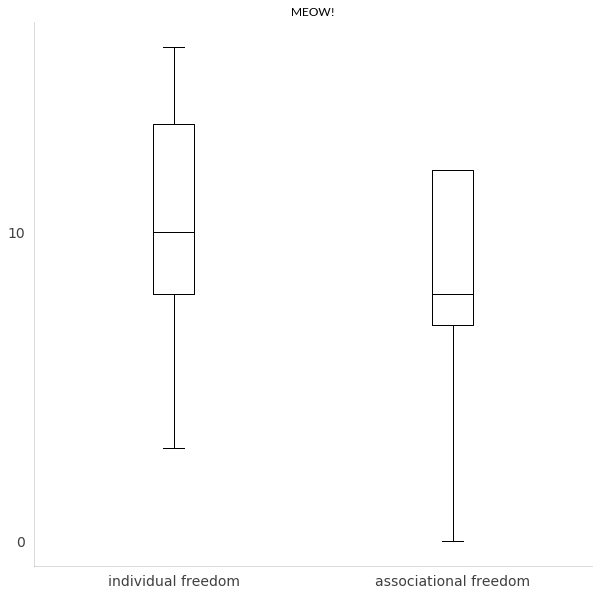

In [19]:
bptest

In [ ]:
bptest

In [20]:
setattr(matplotlib.figure.Figure, 
        'change_title', 
        lambda self, title: self._axstack.as_list()[0].set_title(title))

In [21]:
bptest.change_title("Another new title!")

Text(0.5,1,'Another new title!')

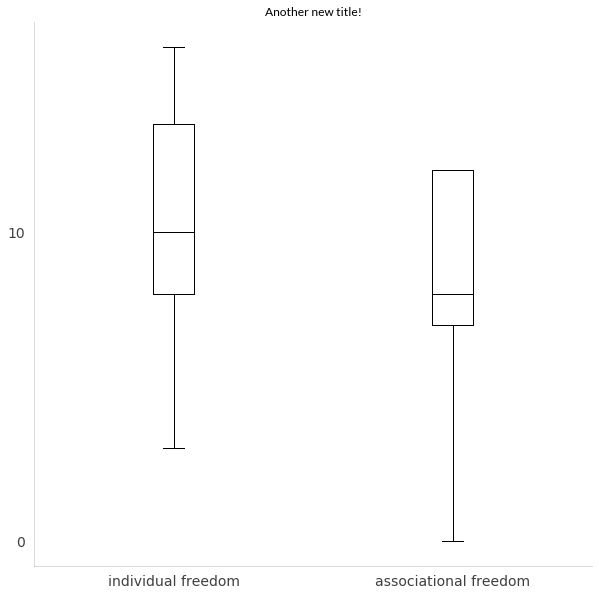

In [22]:
bptest

In [23]:
# ok, time for an experiment with subclassing instead!
class SimpleFigure(matplotlib.figure.Figure):
    def change_title(self, title):
        self._axstack.as_list()[0].set_title(title)

In [24]:
def boxplot2(variables,
            labels,
            title="",
            numticks=3,
            labelsize=14,
            size=(10, 10),
            font="Lato",
            notch=True):
    arrays = [np.sort(np.array(x)) for x in variables]

    fig = plt.figure(figsize=size, FigureClass=SimpleFigure)
    ax = fig.add_subplot(1, 1, 1)

    ax.set_title(title + '\n',
                 fontsize=labelsize * 1.25,
                 fontname=font)

    ax = remove_chart_junk(ax, numticks, labelsize)

    bp = ax.boxplot(arrays, notch=notch, sym="k.", labels=labels)
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color="black")
    return fig

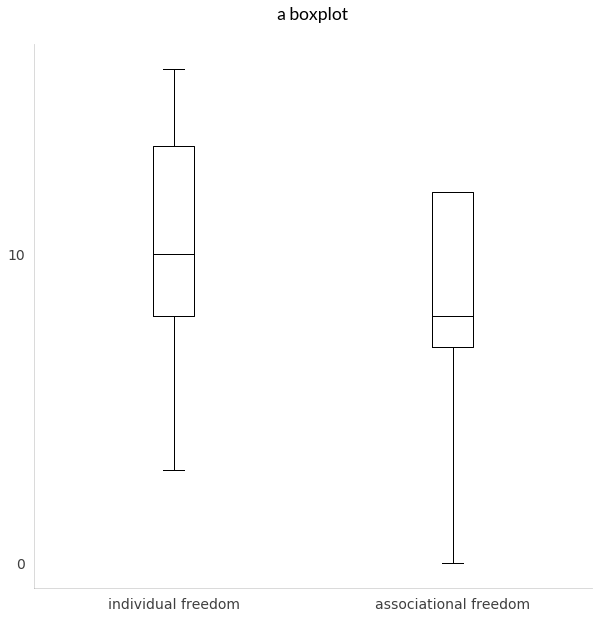

In [25]:
bptest2 = boxplot2([roldf["per_auto"], df["assoc_org"]],
              ["individual freedom", "associational freedom"], 
              "a boxplot", notch=False)

In [26]:
bptest2.change_title("NICE!")

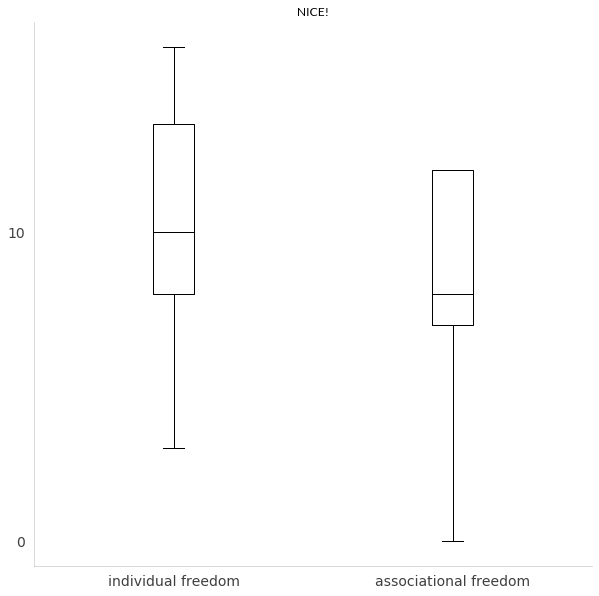

In [27]:
bptest2